In [1]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt

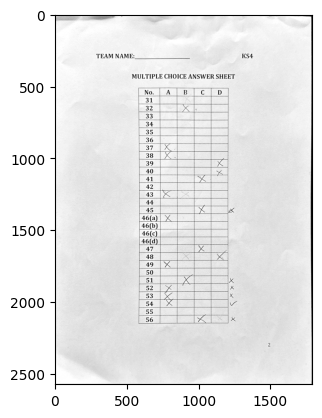

In [2]:
img = cv2.cvtColor(cv2.imread("/home/oliver/Oliver.Mono/projects/Vision.OPT_MULT/data/images/2.jpg"), cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap="gray")

In [ ]:
from typing import List, Tuple

In [ ]:
reader = easyocr.Reader(['en'])  # 'en' is for English; you can add more languages

# Perform OCR on the image
results: List[Tuple[List[List[int, int]], str, float]] = reader.readtext(img)

In [6]:
print(results[0])
print(results[1])

([[282, 270], [557, 270], [557, 314], [282, 314]], 'TEAM NAME:', 0.8551576855702179)
([[1291, 270], [1379, 270], [1379, 314], [1291, 314]], 'KS4', 0.9990056063910113)


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteDetected Text: TEAM NAME:, Confidence: 0.8551576855702179
Detected Text: KS4, Confidence: 0.9990056063910113
Detected Text: MULTIPLE CHOICE ANSWER SHEET, Confidence: 0.7141723998106112
Detected Text: No., Confidence: 0.9959783025561896
Detected Text: A, Confidence: 0.9996220230662267
Detected Text: B, Confidence: 0.9994561219827212
Detected Text: 1 C |, Confidence: 0.37999098763167244
Detected Text: D, Confidence: 0.9917030297964438
Detected Text: 31, Confidence: 0.9999994942378553
Detected Text: 32, Confidence: 0.9999991570631338
Detected Text: 33, Confidence: 0.6907200813293457
Detected Text: 34, Confidence: 0.9999998314126102
Detected Text: 35, Confidence: 0.9999996628252286
Detected Text: 36, Confidence: 0.9999983141264758
Detected Text: 37, Confidence: 0.9999989884757856
Detected Text: 38, Confidence: 0.9999987355947788
Detected Text: 39, Confidence: 0.9999990727694587
Detected Text: 40, Confidence: 0.99

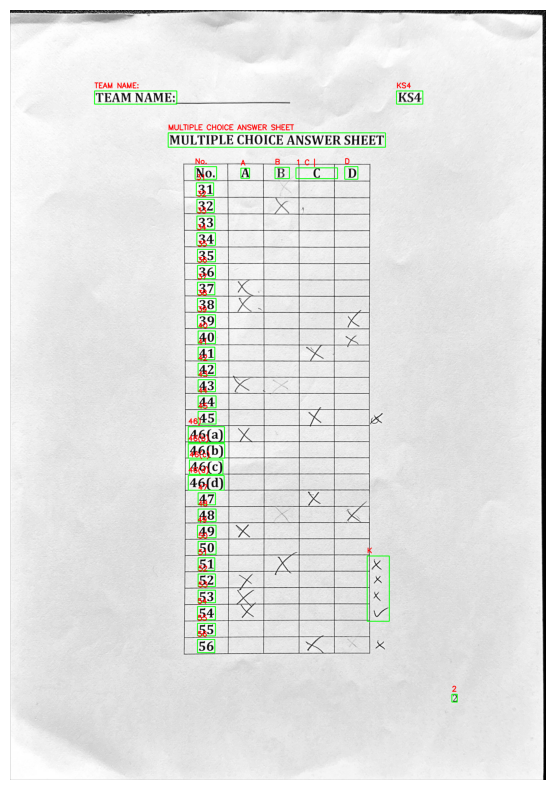

In [ ]:
image_np = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

# Display results
for (bbox, text, confidence) in results:
    print(f"Detected Text: {text}, Confidence: {confidence}")
    # Draw the bounding box on the original image
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))
    cv2.rectangle(image_np, top_left, bottom_right, (0, 255, 0), 2)
    # Annotate image with detected text
    cv2.putText(image_np, text, (top_left[0], top_left[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

# Display the image with bounding boxes and detected text
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()